In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [4]:
class KMeans():

  def __init__(self,K=5,max_iters=100,plot_steps=False):
    self.K = K
    self.max_iters = max_iters
    self.plot_steps = plot_steps

    # list of sample indices for each cluster
    self.clusters = [[] for _ in range(self.K)]
    # centroid points (in form of coordinates)
    self.centroids=[]

  def predict(self,X) :
    self.X=X
    self.n_samples,self.n_features = X.shape

    #initialize..
    random_sample_ind = np.random.choice(self.n_samples,self.K,replace=False)
    self.centroids = [self.X[ind] for ind in random_sample_ind ]

    #Optimizing the centroids ..
    for iter in range (self.max_iters) :
      self.clusters = self.create_clusters(self.centroids)

      if self.plot_steps :
        self.plot()
      
      #Calculating new Centroids from clusters ..
      centroids_old = self.centroids
      self.centroids = self.calculate_centroids(self.clusters)

      #Check for convergence of centroids ..
      if (self.is_converged(centroids_old,self.centroids)) :
        break
      
      if self.plot_steps :
        self.plot()
      
      #Classify samples as index of cluster ..
      return self.get_cluster_label(self.clusters)

  def create_clusters(self,centroids) :
    clusters = [[] for _ in range(self.K)]
    for sample_ind,sample in enumerate(self.X) :
      centroid_ind = self.closest_centroid(sample,centroids)
      clusters[centroid_ind].append(sample_ind)
    return clusters
  
  def closest_centroid(self,sample,centroids) :
    distances = [euclidean_distance(sample,centroid) for centroid in centroids]
    closest_centroid_ind = np.argmin(distances)
    return closest_centroid_ind

  def calculate_centroids(self,clusters) :
    #Calculate mean value of each cluster points ..
    centroids = np.zeros((self.K,self.n_features))
    for cluster_ind,cluster in enumerate(clusters) :
      new_centroid = np.mean(self.X[cluster],axis=0)
      centroids[cluster_ind] = new_centroid
    return centroids

  def is_converged(self,old_centroids,new_centroids):
    distances = [euclidean_distance(old_centroids[i],new_centroids[i]) for i in range(self.K)]
    return sum(distances) == 0

  def get_cluster_label(self,clusters) :
    labels = np.empty(self.n_samples)
    for cluster_ind,cluster in enumerate(clusters) :
      for sample_ind in cluster :
        labels[sample_ind] = cluster_ind
    return labels

  def plot (self) :
    fig, ax = plt.subplots(figsize=(12, 8))

    for i, index in enumerate(self.clusters):
        point = self.X[index].T
        ax.scatter(*point)

    for point in self.centroids:
        ax.scatter(*point, marker="x", color='black', linewidth=2)

    plt.show()

(500, 2)
3


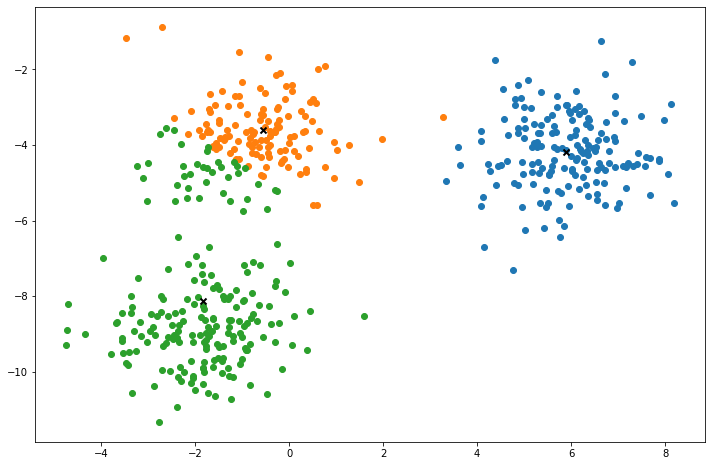

In [6]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)
print(X.shape)
    
clusters = len(np.unique(y))
print(clusters)
k = KMeans(K=clusters, max_iters=300)
y_pred = k.predict(X)

k.plot()